The dataset is highly skewed toward the cities included in Delhi-NCR. So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our analysis turn toward Delhi-NCR v Rest of India.

I. Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

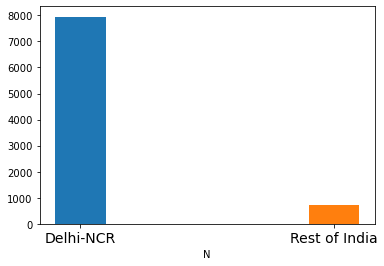

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv('zomato.csv',encoding='ISO-8859-1')
df.dropna(inplace=True)
df=df.copy()

pd.set_option('mode.chained_assignment', None)    # disable SettingWithCopy warning

df["City"].replace("New Delhi", "Delhi-NCR", inplace=True)    # clean data
df["City"].replace("Ghaziabad", "Delhi-NCR", inplace=True)    # clean data
df["City"].replace("Noida", "Delhi-NCR", inplace=True)    # clean data
df["City"].replace("Gurgaon", "Delhi-NCR", inplace=True)    # clean data
df["City"].replace("Faridabad", "Delhi-NCR", inplace=True)    # clean data
df=df[df['Country Code']==1]
df_1=df[df['City']=='Delhi-NCR']
df_2=df[df['City']!='Delhi-NCR']

plt.bar(['Delhi-NCR'],df_1.count(),width=.2)
plt.bar(['Rest of India'],df_2.count(),width=.2)
plt.xticks(ha='center', fontsize=14)
plt.xlabel('N')

plt.show()



II Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.

In [2]:
df_1_cu=df_1.Cuisines.str.split(',',expand=True)
df_2_cu=df_2.Cuisines.str.split(',',expand=True)

df_1_cu = df_1_cu.fillna(value='empty')
df_2_cu = df_2_cu.fillna(value='empty')

array1=np.array(df_1_cu)
array2=np.array(df_2_cu)

df_1_dict={}
df_2_dict={}

for row in range(len(array1)):
    for i in range(7):
        if array1[row][i].strip() in df_1_dict:
            df_1_dict[array1[row][i].strip()]+=1
        else:
            df_1_dict[array1[row][i].strip()]=1

for row in range(len(array2)):
    for i in range(7):
        if array2[row][i].strip() in df_2_dict:
            df_2_dict[array2[row][i].strip()]+=1
        else:
            df_2_dict[array2[row][i].strip()]=1

            
notinncrlist=[]

for key in df_2_dict:
    if key not in df_1_dict:
        notinncrlist.append(key)
    else:
        continue

for i in notinncrlist:
    print(i)


German
Malwani
BBQ
Cajun


III Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

In [3]:
list1 = sorted(df_1_dict.items(), key=lambda x: x[1], reverse=True)
list2 = sorted(df_2_dict.items(), key=lambda x: x[1], reverse=True)



for i in range(10):
    print(i+1,list1[1:11][i],",",list2[1:11][i])
    




1 ('North Indian', 3597) , ('North Indian', 349)
2 ('Chinese', 2448) , ('Chinese', 242)
3 ('Fast Food', 1866) , ('Continental', 177)
4 ('Mughlai', 933) , ('Italian', 147)
5 ('Bakery', 697) , ('Cafe', 136)
6 ('South Indian', 569) , ('Fast Food', 97)
7 ('Continental', 547) , ('South Indian', 62)
8 ('Desserts', 542) , ('Mughlai', 58)
9 ('Street Food', 538) , ('Desserts', 55)
10 ('Italian', 535) , ('Mexican', 50)


IV Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.

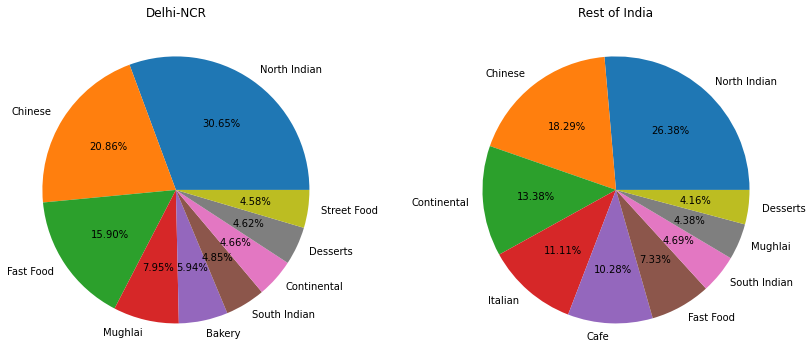

In [4]:
dish1,dish2,count1,count2=[],[],[],[]


for item in list1:
        dish1.append(item[0])
        count1.append(item[1])
for item in list2:
        dish2.append(item[0])
        count2.append(item[1])


        
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,12))

ax1.pie(count1[1:10], labels=dish1[1:10],autopct='%0.2f%%')
ax1.title.set_text('Delhi-NCR')
ax2.pie(count2[1:10], labels=dish2[1:10],autopct='%0.2f%%')
ax2.title.set_text('Rest of India')
fig.tight_layout(pad=3.0)
plt.show()





Our pie chart shows a clear distinction of food choices for these two different region.There is close similarity in food preference of these two regions as far as north Indian and chinese dishes are concerned. However that being said remaining food choices show remarkable differences.

Delhi NCR region loves North Indian dishes more than its couterpart. Top 3 food preference of Delhi NCR region include North Indian, chinese, and Fast food cuisines. Continental food is not much preferred here while rest of India have more than 13% preference of continental food along with Italian dishes at 11%. However Delhi NCR are favours Mughlai cuisine after exhausting its most three favoured foods.





#### User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant.

I. Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.


    Number of Votes given Restaurant
    Restaurant serving more number of cuisines.
    Average Cost of Restaurant
    Restaurant serving some specific cuisines.


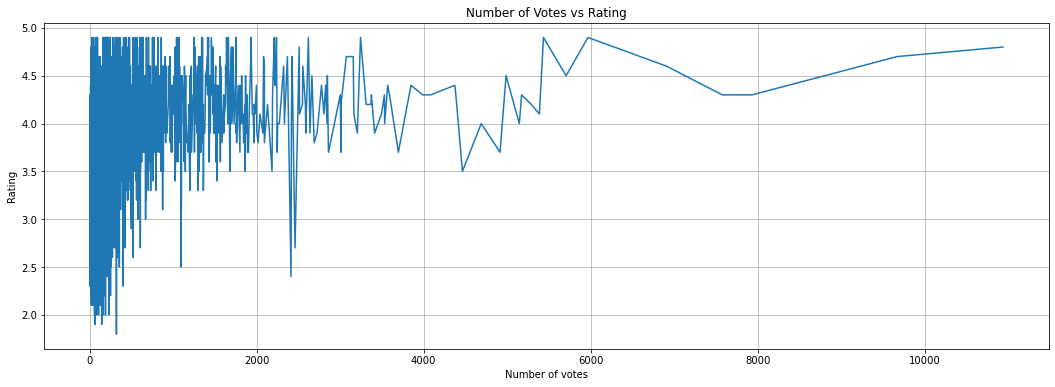

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv('zomato.csv',encoding='ISO-8859-1')
df.dropna(inplace=True)
df=df[df['Aggregate rating']!=0]
cuisine_rating=df.Cuisines.str.split(',',expand=True)
cuisine_rating['count']=cuisine_rating.count(1)
cuisine_rating['Aggregate rating']=df['Aggregate rating']

votes_rating=df[['Votes','Aggregate rating']]                  # first set

cuisine_df=df.Cuisines.str.split(',',expand=True)
cuisine_df['count']=cuisine_df.count(1)
cuisine_df['count']=cuisine_df['count']-2    # correction after manual inspection
cuisine_df['Aggregate rating']=df['Aggregate rating']
cuisine_rating=cuisine_df[['count','Aggregate rating']]
cuisine_rating=cuisine_rating.groupby(by='count',as_index=False,sort=True).mean()      # second set

cost_rating=df[['Average Cost for two','Aggregate rating']]    # Third set

onecuisine_rating=cuisine_df[cuisine_df['count']==1]
onecuisine_rating.rename(columns={0: "cuisine"}, inplace=True)
onecuisine_rating=onecuisine_rating[['cuisine','Aggregate rating']]    # Fourth set

# line plot on set 1
fig, ax = plt.subplots(figsize=(18,6))
votes_rating.sort_values(by=['Votes'],inplace=True)
plt.plot(votes_rating['Votes'],votes_rating['Aggregate rating'])
plt.xlabel('Number of votes')
plt.ylabel('Rating')
plt.grid()
plt.title('Number of Votes vs Rating')
plt.show()

we have drawn a line plot of rating against number of rating votes. It is observed that as the rating numbers increases the rating curve smoothens. Further, the curve shows a higher trend as the number of rating further increases and assumes a constant nature. we can conclusively say from this curve that after the threshold of around 6000 ratings the further ratings are easy to predict and stays at the level achieved.

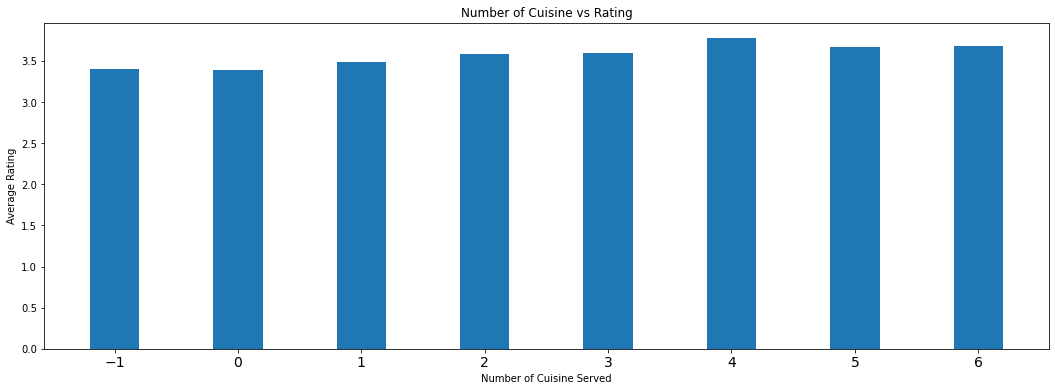

In [6]:
# bar plot on set 2
fig, ax = plt.subplots(figsize=(18,6))
plt.bar(cuisine_rating['count'],cuisine_rating['Aggregate rating'],width=.4)
plt.xticks(ha='center', fontsize=14)
plt.xlabel('Number of Cuisine Served')
plt.ylabel('Average Rating')
plt.title('Number of Cuisine vs Rating')
plt.show()


The bar plot here demonstrate the average rating vs number of cuisine served in the restaurant. A flat trend is observed across the category with a higher tilt at the threshold of more than 3 cuisine. it is safe to assume the more number of cuisine in menu have positive impact on the restaurant rating. Highest rating is observed for the category of 6 cuisine serving restaurant.

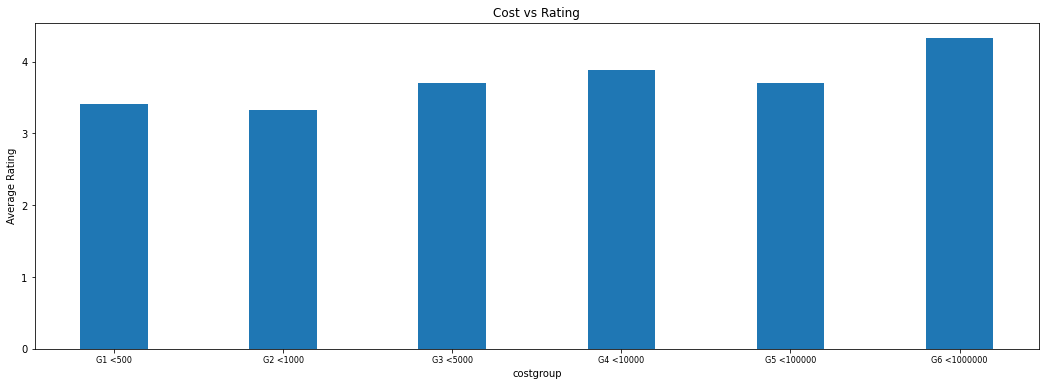

In [7]:
## For set 3
cost_rating.rename(columns={'Average Cost for two': 'cost','Aggregate rating':'rating'}, inplace=True)

#an easy way is to group the costinto a new column "hourgroup" and work with that.
cost_rating.loc[cost_rating.cost.isin([i for i in range(500)]), 'costgroup'] = 'G1 <500'
cost_rating.loc[cost_rating.cost.isin([i for i in range(500,1000)]), 'costgroup'] = 'G2 <1000'
cost_rating.loc[cost_rating.cost.isin([i for i in range(1000,5000)]), 'costgroup'] = 'G3 <5000'
cost_rating.loc[cost_rating.cost.isin([i for i in range(5000,10000)]), 'costgroup'] = 'G4 <10000'
cost_rating.loc[cost_rating.cost.isin([i for i in range(10000,100000)]), 'costgroup'] = 'G5 <100000'
cost_rating.loc[cost_rating.cost.isin([i for i in range(100000,1000000)]), 'costgroup'] = 'G6 <1000000'

#Then collect the grouped values in a new dataframe.
cost_rating = cost_rating.groupby(['costgroup'])['rating'].mean().reset_index()

# bar plot on set 3
fig, ax = plt.subplots(figsize=(18,6))
plt.bar(cost_rating['costgroup'],cost_rating['rating'],width=.4)
plt.xticks(ha='center', fontsize=8)
plt.xlabel('costgroup')
plt.ylabel('Average Rating')
plt.title('Cost vs Rating')
plt.show()


The bar plot here reflects the rating across different cost segment. Highest rating is observed for 100000 to 1000000 cost bracket. while the lowest rating is in 500 to 1000 cost bracket.

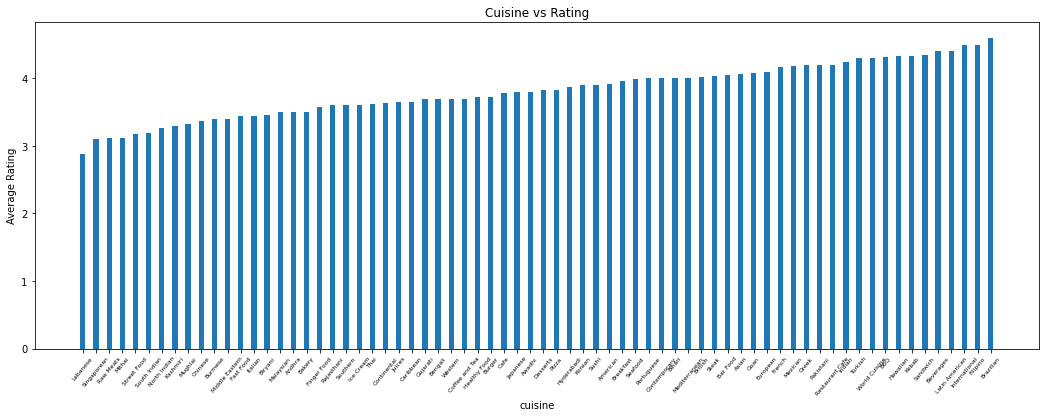

In [8]:
#onecuisine_rating=onecuisine_rating[onecuisine_rating['Aggregate rating']!=0]
onecuisine_rating=onecuisine_rating.groupby(by=['cuisine'],as_index=False).mean()
onecuisine_rating.sort_values(by=['Aggregate rating'],inplace=True)

# Bar plot on set 4
fig, ax = plt.subplots(figsize=(18,6))
plt.bar(onecuisine_rating['cuisine'],onecuisine_rating['Aggregate rating'],width=.4)
plt.xticks(ha='center',rotation='50', fontsize=6)
plt.xlabel('cuisine')
plt.ylabel('Average Rating')
plt.title('Cuisine vs Rating')
plt.show()


The bar plot here demonstrate the average rating across the restaurant serving only single specific cuisine. It is observed that all the rating are 3 or above. also the rating band of 3-5 is well distributed across multiple segment of cuisines.

### II. Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?

    Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .


In [9]:
df_lr=df[['Locality','Votes','Aggregate rating']]
df_lr['votes_rating']=df_lr['Votes']*df_lr['Aggregate rating']

weighted_df=df_lr.groupby(by=['Locality'],as_index=False)['votes_rating'].sum()
votes_df=df_lr.groupby(by=['Locality'],as_index=False)['Votes'].sum()
weighted_df['rweighted']=weighted_df['votes_rating']/votes_df['Votes']
weighted_df=weighted_df[['Locality','rweighted']]

weighted_df.sort_values(by=['rweighted'],ascending=False,ignore_index=True,inplace=True)
weighted_df[1:10]

,Locality,rweighted
1,"Taman Impian Jaya Ancol, Ancol",4.9
2,Aminabad,4.9
3,Deira City Centre Area,4.9
4,Setor De Clubes Esportivos Sul,4.9
5,Gíçvea,4.9
6,"Nassima Royal Hotel, Trade Centre Area",4.9
7,"Sofitel Philippine Plaza Manila, Pasay City",4.9
8,DIFC,4.9
9,New Tampa,4.9


### Visualization

    Plot the bar graph top 15 restaurants have a maximum number of outlets.
    Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).
    Plot the bar graph top 10 restaurants in the data with the highest number of votes.
    Plot the pie graph of top 10 cuisines present in restaurants in the USA.
    Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted             restaurant  rating of the city in a bubble.


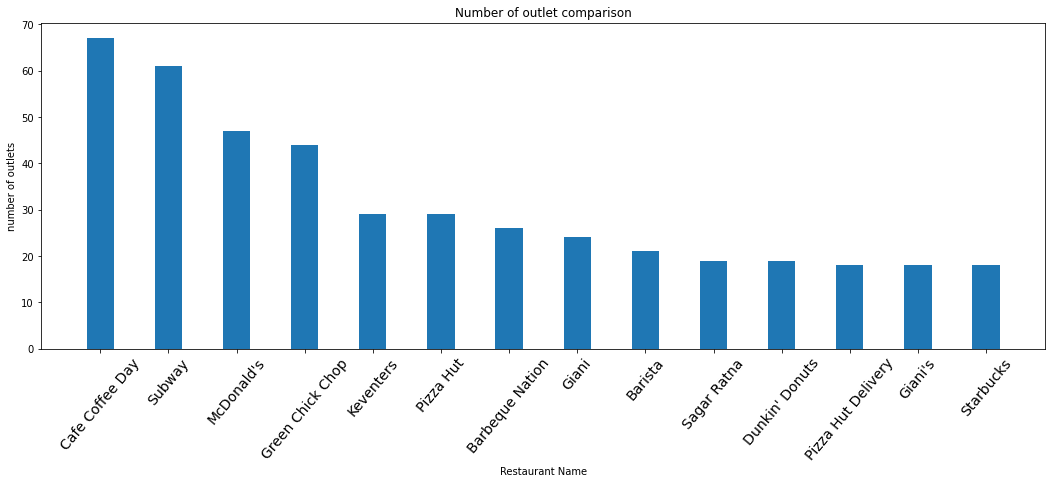

In [10]:
df_name=df.groupby(by=['Restaurant Name'],as_index=False).size()
df_name.sort_values(by=['size'],ascending=False,ignore_index=False,inplace=True)
df_name=df_name[1:15]

fig, ax = plt.subplots(figsize=(18,6))
plt.bar(df_name['Restaurant Name'],df_name['size'],width=.4)
plt.xticks(ha='center',rotation='50', fontsize=14)
plt.xlabel('Restaurant Name')
plt.ylabel('number of outlets')
plt.title('Number of outlet comparison')
plt.show()


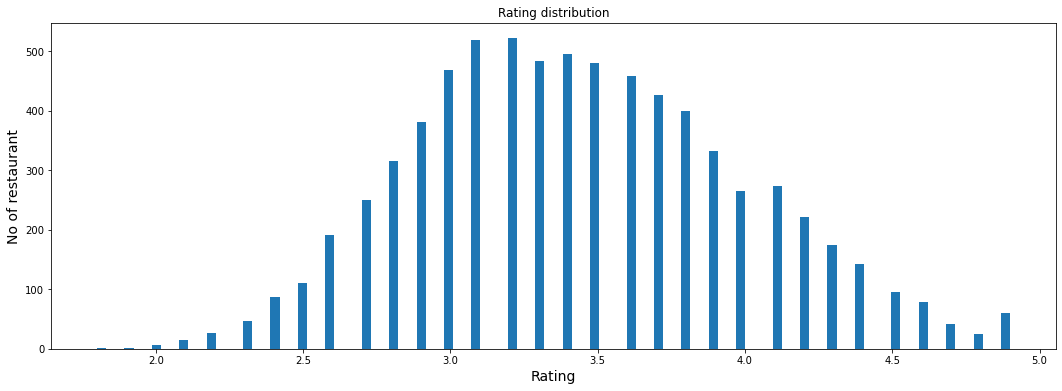

In [11]:
df_rating=df[df['Aggregate rating']!=0] 

fig,ax=plt.subplots(figsize=(18,6))
plt.hist(df_rating['Aggregate rating'],bins=100)
plt.title('Rating distribution')
plt.xlabel('Rating',fontsize=14)
plt.ylabel('No of restaurant',fontsize=14)
plt.show()

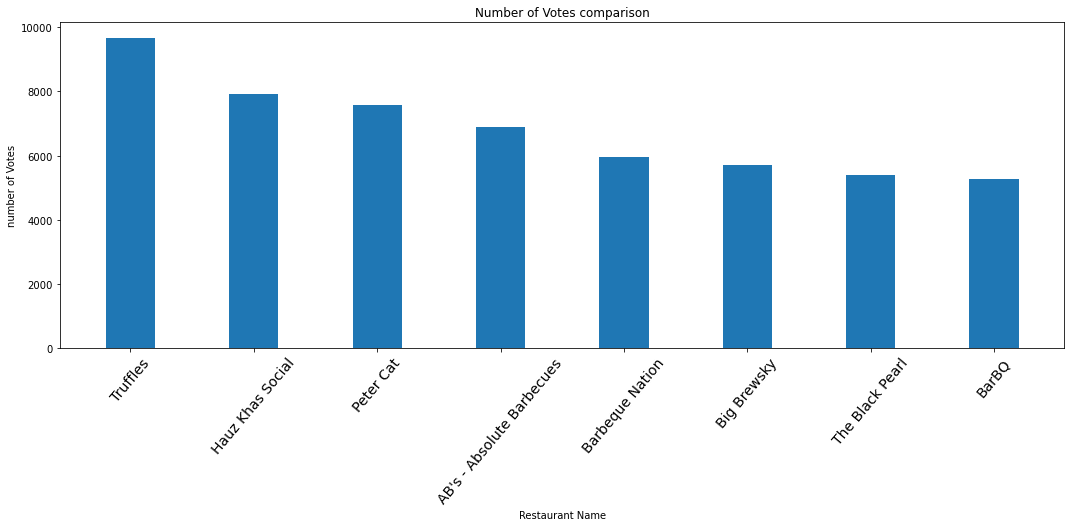

In [12]:
df_votes=df[['Restaurant Name','Votes']]
df_votes.sort_values(by=['Votes'],ascending=False,ignore_index=False,inplace=True)
df_votes=df_votes[1:10]

fig, ax = plt.subplots(figsize=(18,6))
plt.bar(df_votes['Restaurant Name'],df_votes['Votes'],width=.4)
plt.xticks(ha='center',rotation='50', fontsize=14)
plt.xlabel('Restaurant Name')
plt.ylabel('number of Votes')
plt.title('Number of Votes comparison')
plt.show()

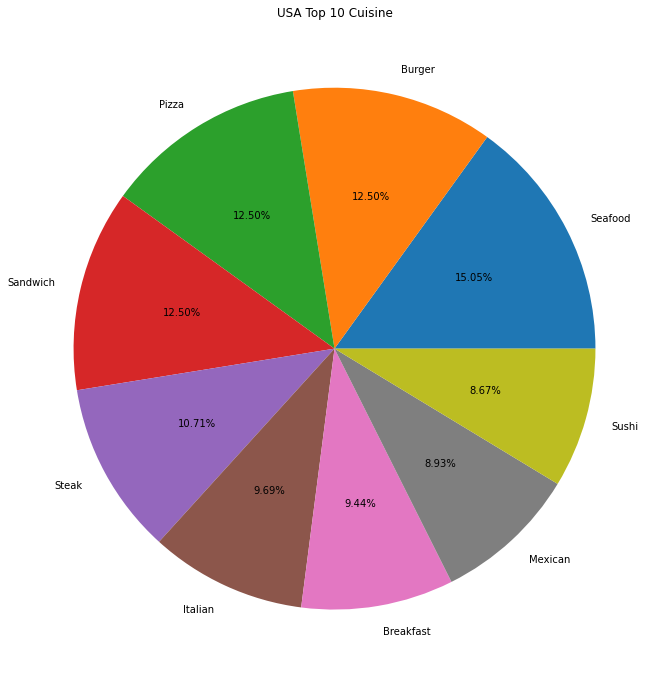

In [13]:
df_usa=df[df['Country Code']==216]
df_usa=df_usa.Cuisines.str.split(',',expand=True)

dfusa_1=df_usa[0].value_counts()
dfusa_2=df_usa[1].value_counts()
dfusa_3=df_usa[2].value_counts()
dfusa_4=df_usa[3].value_counts()

cuisine_dic={}
df_list=[dfusa_1,dfusa_2,dfusa_3,dfusa_4]


for item in df_list:
    for index in item.index:   #item df_2
        index1=index.strip()
        if index1 in cuisine_dic:
            cuisine_dic[index1]+=item[index]
        else:
            cuisine_dic[index1]=item[index]
            
# sort the dictionary in descending order and convert to list
            
cuisine_list=sorted(cuisine_dic.items(), key=lambda item: item[1],reverse=True)

cuisine_list=cuisine_list[1:10]

# pie plot
fig, ax = plt.subplots(figsize=(12,12))
ax.pie([i[1] for i in cuisine_list], labels=[i[0] for i in cuisine_list],autopct='%0.2f%%')
ax.title.set_text('USA Top 10 Cuisine')
plt.show()

Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted             restaurant  rating of the city in a bubble.

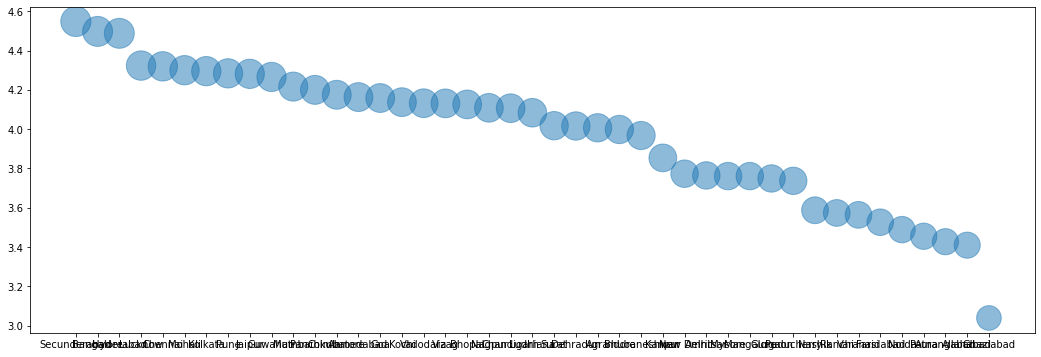

In [14]:
df_india=df[df['Country Code']==1]

df_india=df_india[['City','Votes','Aggregate rating']]
df_india['votes_rating']=df_india['Votes']*df_india['Aggregate rating']

weighted_dfindia=df_india.groupby(by=['City'],as_index=False)['votes_rating'].sum()
votes_dfindia=df_india.groupby(by=['City'],as_index=False)['Votes'].sum()
weighted_dfindia['rweighted']=weighted_dfindia['votes_rating']/votes_dfindia['Votes']
weighted_dfindia=weighted_dfindia[['City','rweighted']]

weighted_dfindia.sort_values(by=['rweighted'],ascending=False,ignore_index=True,inplace=True)

plt.figure(figsize=(18,6))
plt.scatter(weighted_dfindia['City'],weighted_dfindia['rweighted'],alpha=0.5,s=weighted_dfindia['rweighted']*200)
plt.show()

### This coding was done by @RK2021